<a href="https://colab.research.google.com/github/Nikitanegi0410/ML-Project---Rossmann-Sales-Prediction-/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
store_data = pd.read_csv('/content/drive/MyDrive/EDA Project/store.csv')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train_data = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
train_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
comb_data = pd.merge(store_data,train_data,on='Store')
comb_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [10]:
comb_data.shape

(1017209, 18)

In [11]:
null= pd.DataFrame({'Null Value': comb_data.isna().sum() , 'Percentage' : (comb_data.isna().sum()) / (comb_data.shape[0]) * (100)})
null

,Null Value,Percentage
Store,0,0.000000
StoreType,0,0.000000
Assortment,0,0.000000
CompetitionDistance,2642,0.259730
CompetitionOpenSinceMonth,323348,31.787764
CompetitionOpenSinceYear,323348,31.787764
Promo2,0,0.000000
Promo2SinceWeek,508031,49.943620
Promo2SinceYear,508031,49.943620
PromoInterval,508031,49.943620


In [12]:
#Finding unique value
columns = list(comb_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print('Unique values in column :',comb_data[i].unique())

Unique values in column : [   1    2    3 ... 1113 1114 1115]
Unique values in column : ['c' 'a' 'd' 'b']
Unique values in column : ['a' 'c' 'b']
Unique values in column : [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in column : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in column : [0 1]
Unique values in column : [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in column : [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in column : [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Unique values in column : [5 4 3 2 1 7 6]
Unique values in column : [ 5263  5020  4782 ... 20362 18841 21237]
Unique values in column : [ 555  546  523 ... 3727 4022 4106]
Unique values in column : [1 0]
Unique values in column : [1 0]
Unique values in column : ['0' 'a' 'b' 'c

Data Visualization

In [13]:
# extracting year and month from Date
comb_data['year'] = comb_data['Date'].apply(lambda x : int(str(x)[0:4]))
comb_data['month'] = comb_data['Date'].apply(lambda x : int(str(x)[5:7]))

[Text(0.5, 1.0, 'Year vs Sales')]

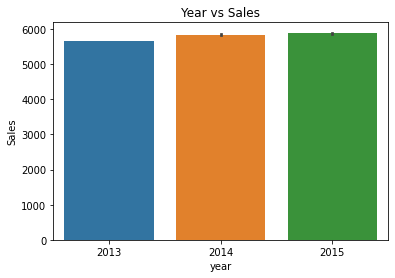

In [14]:
sns.barplot(x='year', y='Sales', data=comb_data).set(title='Year vs Sales')

Observation

Every year sale is increasing.

[Text(0.5, 1.0, 'Sales vs Day of Week')]

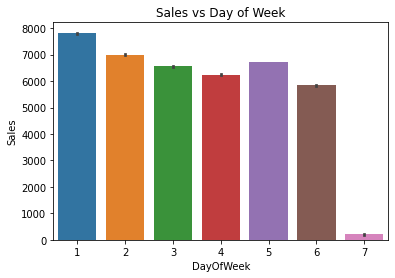

In [15]:
#sales according to days of week
sns.barplot(x='DayOfWeek',y='Sales',data=comb_data).set(title='Sales vs Day of Week')

**Observation**

Sales on 1 (Monday) and 5 (Friday) are the highest.

In [16]:
#StoreType count
comb_data['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

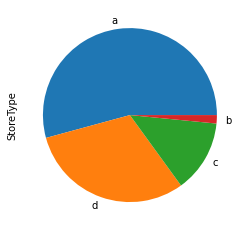

In [17]:
comb_data['StoreType'].value_counts().plot.pie()

[Text(0.5, 1.0, 'StoreType vs Sales')]

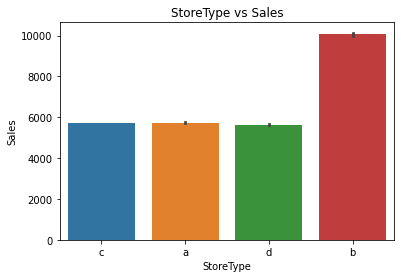

In [18]:
#Sales with respect to 'StoreType' 
sns.barplot(x='StoreType', y='Sales', data=comb_data).set(title='StoreType vs Sales')

**Observation**

B storetype counts are very less as compared to other students but Of all a,b,c,d are store models b type stores have the highest sales.



[Text(0.5, 1.0, 'sales vs Assortment')]

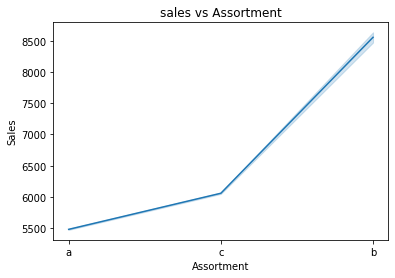

In [21]:
sns.lineplot(x='Assortment',y='Sales', data = comb_data).set(title='sales vs Assortment')

**Observation:**

Assortment level 'b' have the highest sales

[Text(0.5, 1.0, 'School Holiday vs Sales')]

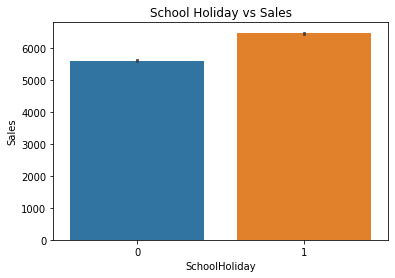

In [22]:
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=comb_data).set(title='School Holiday vs Sales')

**Observation:**

On School Holidays there are more sales

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


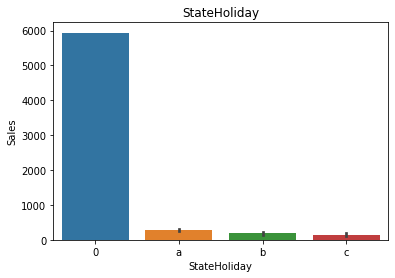

In [42]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
comb_data['StateHoliday'].loc[comb_data['StateHoliday'] == 0] ='0'
sns.barplot(x= 'StateHoliday',y = 'Sales',data= comb_data).set(title= 'StateHoliday')
plt.show()

**Observation:**

Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c

where

a = Public Holiday, b = Easter Holiday, c = Chirstmas, 0 = No Holiday, Working day